# Final Project - Unsupervised Learning on Online Retail Dataset (Customer Segmentation)

## Dataset

For this project we are using [Kaggel: Online Retail Dataset](https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset). This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

## 1. Project Description

In this project we attempt to present a systematic approach for analyzing the Online Retail dataset and building an unsupervised machine learning model for doing customer segmentation based on their purchasing behavior. Our goal is to achive the following: 
- Create RFM features for the data (explained in next section).
- Create clusters of customer based on their purchasing behavior using Recency, Frequency, and Monetary (RFM) analysis.
- Create Product recommender using Cosine Similarity Matrix for each cluster. 

### RFM (Recency, Frequency, Monetary) Analysis
RFM is a powerful quantitative marketing analysis technique used to segment customers based on their past purchasing behavior. It's a widely adopted method, especially in retail and e-commerce, because it's intuitive and highly effective in identifying most valuable customers. 

#### RFM stands for:

- Recency (R): How recently did a customer make a purchase? Typically measured in days since the last transaction. Customers who have purchased more recently are generally more likely to respond to promotions and are considered more "engaged." A lower Recency value (fewer days) is better.

- Frequency (F): How often does a customer make purchases? The total number of unique transactions made by a customer over a specific period. Customers who buy more frequently are often more loyal and integrated into the business. A higher Frequency value is better.

- Monetary (M): How much money does a customer spend? The total amount of money a customer has spent over a specific period. Customers who spend more money are generally more valuable to the business. A higher Monetary value is better.

## 2. What Problem we are solving?

Traditional RFM based customer segmentation is often done based on a predefined rules-based RFM thresholds. This manual approach has following disadvantages:

- This method rely heavily on domain expertise, intuition, and trial-and-error. 
What's "high," "medium," or "low" for Recency, Frequency, or Monetary values is subjective and can vary significantly between businesses or even over time for the same business. These thresholds might not be optimal or truly reflect natural groupings in the data.

- You're limited to the segment types you can pre-define.

- Inherit the biases of the person defining them. If their intuition is flawed or based on outdated data, the segments will reflect that.

To address these problems, we are creating machine unpervised machine learning analysis approach where algorithm learns the natural groupings directly from the data. Which has following advantages:

- Offers a data-driven, objective, and more sophisticated approach to customer segmentation.

- Can uncover patterns and segments one might not have anticipated.

- Is highly adaptable. You can easily add more features to the clustering algorithm, and it will automatically try to find segments in the higher-dimensional space.



## 3. Exploratory Data Analysis

###  3.1 Basic EDA

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('../data/online_retail.csv')
print(f"Dataset loaded successfully! Shape: {df.shape}")

print("DATA INSPECTION")
print("\n1. First 10 rows:")
print(df.head(5))

print("\n2. Data statistics:")
print(df.describe())

print(f"\n3. Dataset shape: {df.shape}")


# Add 'Value' column to df as UnitPrice * Quantity
df['Value'] = df['UnitPrice'] * df['Quantity']

print("DATA INSPECTION")
print("\n1. First 10 rows:")
print(df.head(5))

print("\nMISSING VALUES ANALYSIS")
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Loading dataset...
Dataset loaded successfully! Shape: (541909, 8)
DATA INSPECTION

1. First 10 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

2. Data statistics:
            Quantity      UnitPrice     CustomerID
count  54

### 3.2 Detailed EDA

DETAILED QUANTITY ANALYSIS


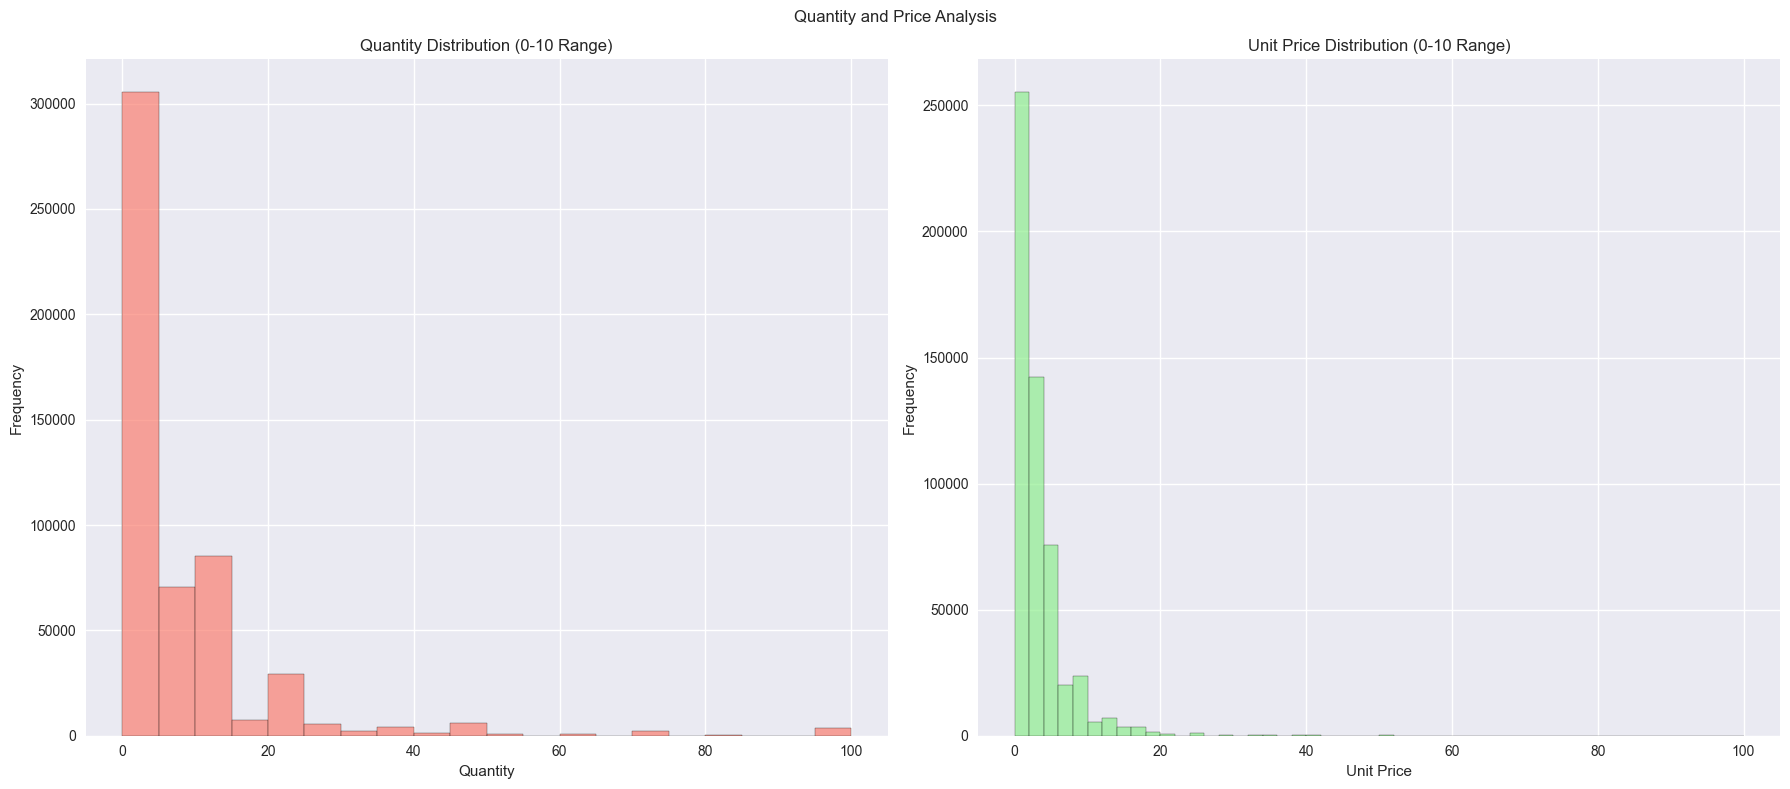

TIME-BASED ANALYSIS


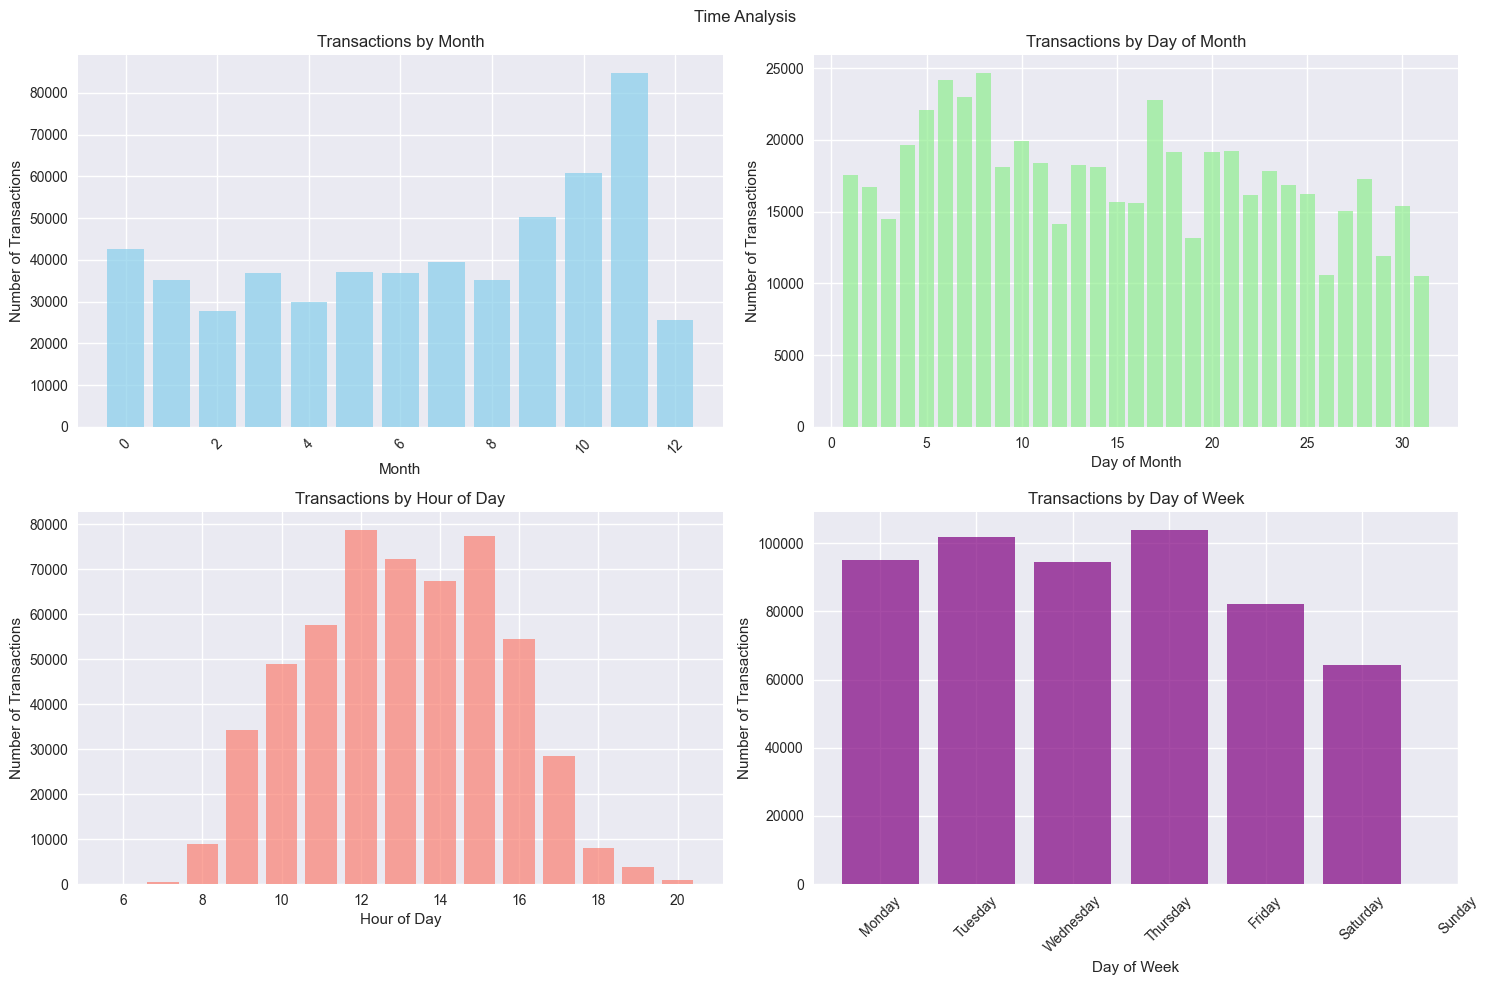

COUNTRY-WISE ANALYSIS


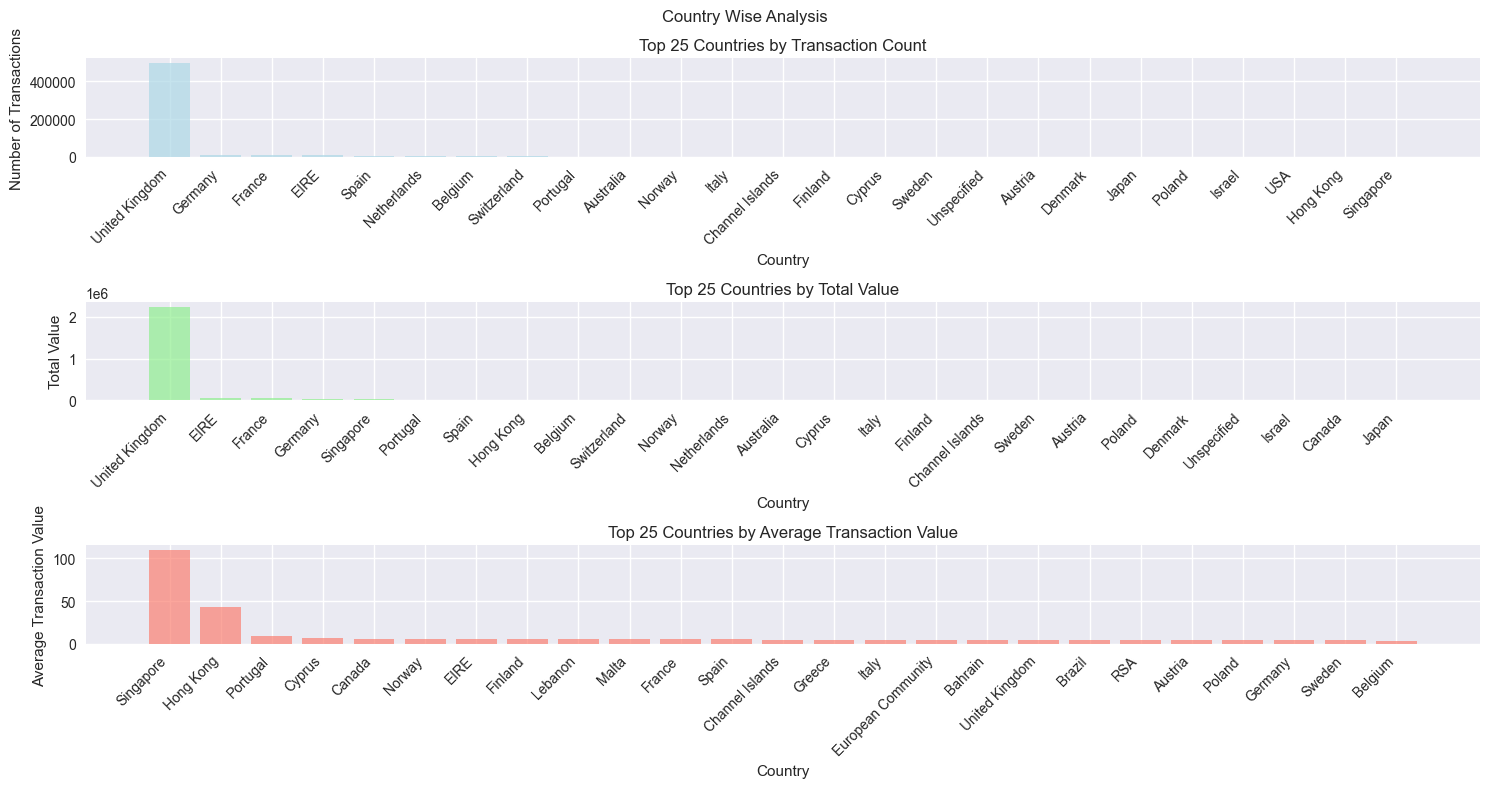

CUSTOMER ANALYSIS


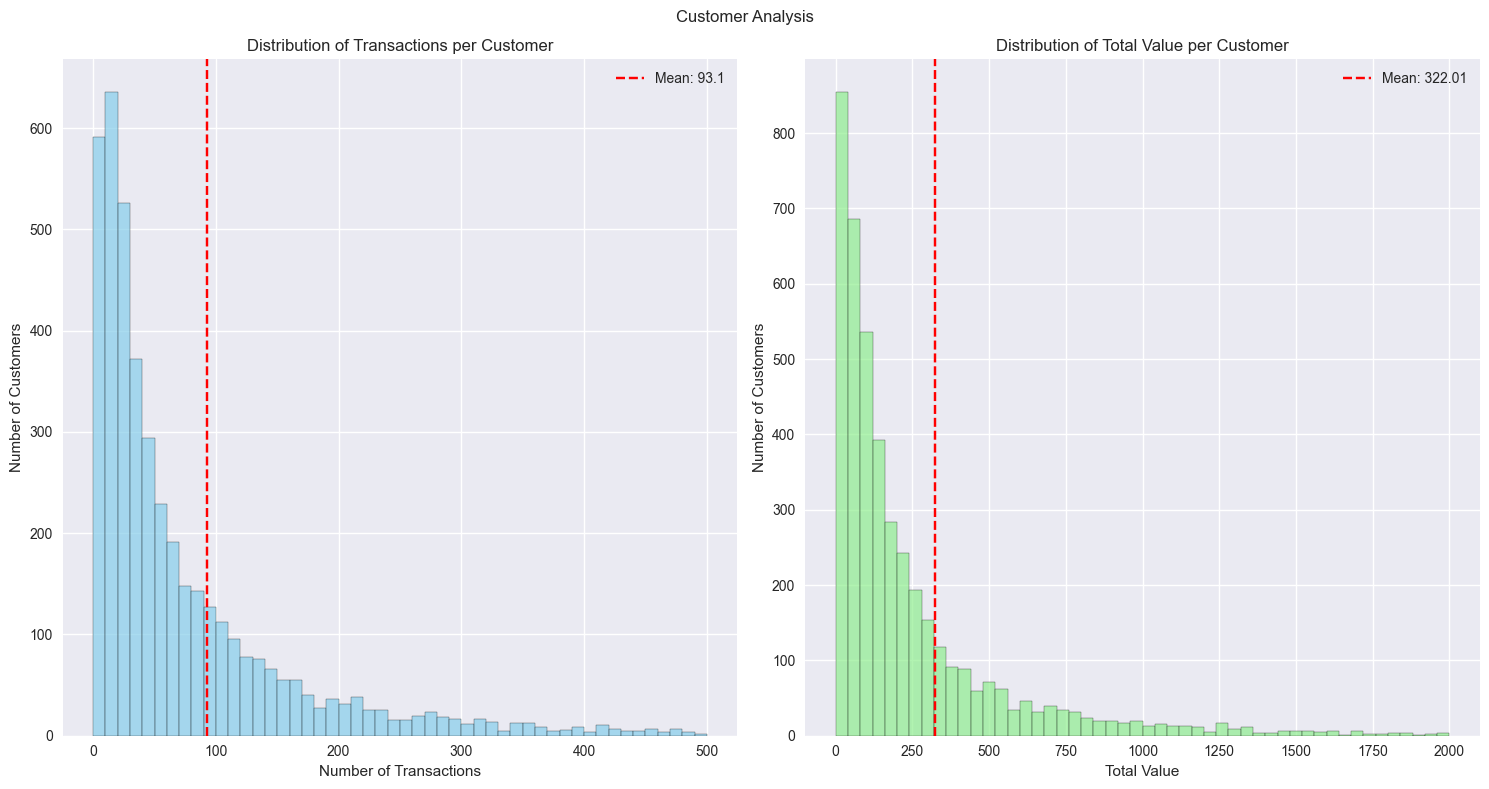

PRODUCT ANALYSIS


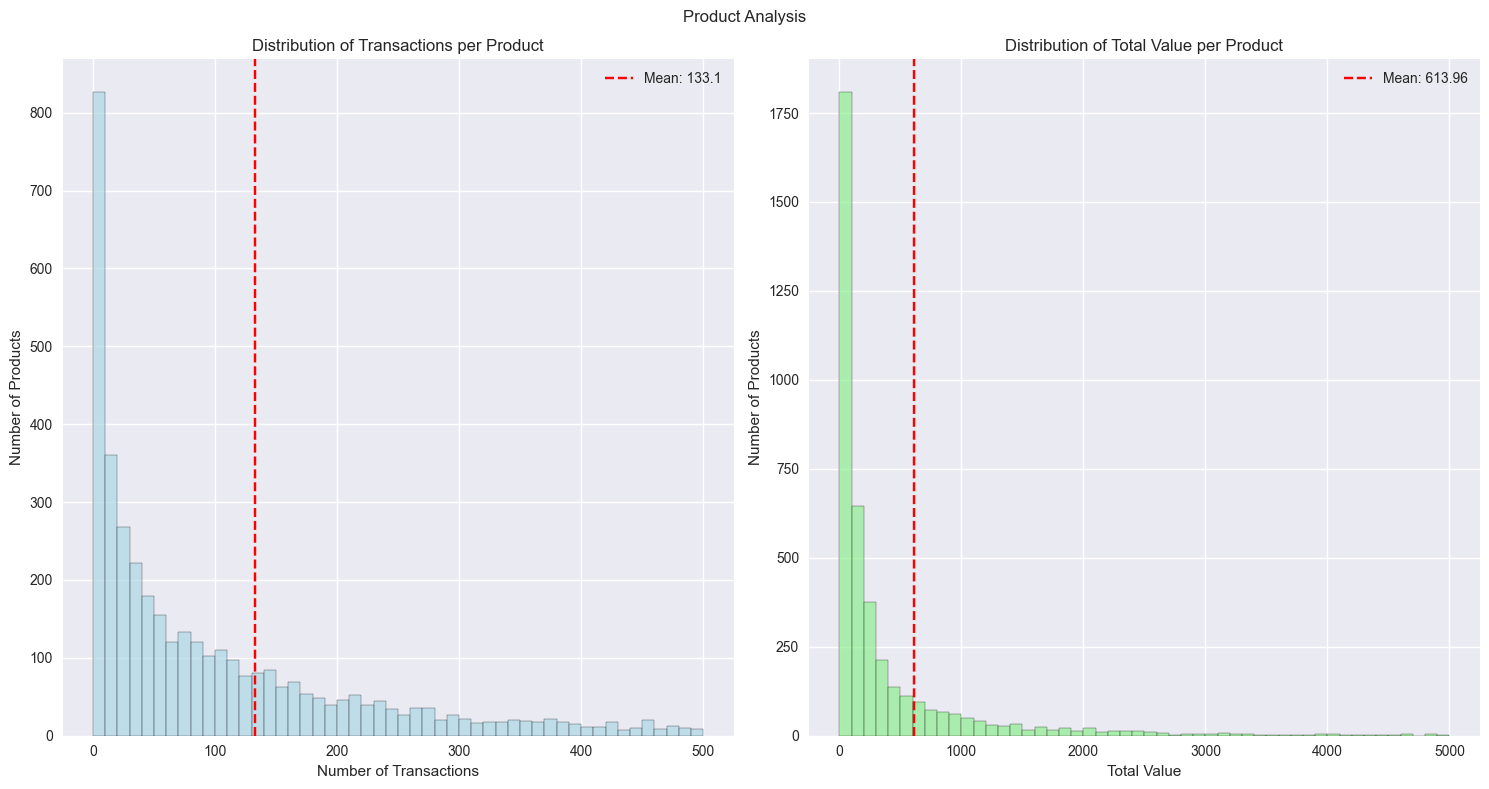

In [46]:
# 2. Detailed Quantity Analysis with Multiple Histograms
print("DETAILED QUANTITY ANALYSIS")

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
# Quantity distribution with different ranges
axes[0].hist(df['Quantity'].dropna(), bins=20, alpha=0.7, color='salmon', edgecolor='black', range=(0, 100))
axes[0].set_title('Quantity Distribution (0-10 Range)')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

# Focus on lower prices (most common)
axes[1].hist(df['UnitPrice'].dropna(), bins=50, alpha=0.7, color='lightgreen', edgecolor='black', range=(0, 100))
axes[1].set_title('Unit Price Distribution (0-10 Range)')
axes[1].set_xlabel('Unit Price')
axes[1].set_ylabel('Frequency')
plt.suptitle('Quantity and Price Analysis')
plt.tight_layout()
plt.show()

# 4. Time-based Analysis with Histograms
print("TIME-BASED ANALYSIS")

# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly distribution
monthly_counts = df['InvoiceDate'].dt.to_period('M').value_counts().sort_index()
axes[0, 0].bar(range(len(monthly_counts)), monthly_counts.values, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Transactions by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].tick_params(axis='x', rotation=45)

# Daily distribution
daily_counts = df['InvoiceDate'].dt.day.value_counts().sort_index()
axes[0, 1].bar(daily_counts.index, daily_counts.values, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Transactions by Day of Month')
axes[0, 1].set_xlabel('Day of Month')
axes[0, 1].set_ylabel('Number of Transactions')

# Hourly distribution
hourly_counts = df['InvoiceDate'].dt.hour.value_counts().sort_index()
axes[1, 0].bar(hourly_counts.index, hourly_counts.values, alpha=0.7, color='salmon')
axes[1, 0].set_title('Transactions by Hour of Day')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Transactions')

# Day of week distribution
dow_counts = df['InvoiceDate'].dt.dayofweek.value_counts().sort_index()
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[1, 1].bar(range(len(dow_counts)), dow_counts.values, alpha=0.7, color='purple')
axes[1, 1].set_title('Transactions by Day of Week')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Number of Transactions')
axes[1, 1].set_xticks(range(len(dow_names)))
axes[1, 1].set_xticklabels(dow_names, rotation=45)

plt.suptitle('Time Analysis')
plt.tight_layout()
plt.show()

# 5. Country-wise Analysis with Histograms
print("COUNTRY-WISE ANALYSIS")

fig, axes = plt.subplots(3, 1, figsize=(15, 8))

# Top 25 countries by transaction count
country_counts = df['Country'].value_counts().head(25)
axes[0].bar(range(len(country_counts)), country_counts.values, alpha=0.7, color='lightblue')
axes[0].set_xticks(range(len(country_counts)))
axes[0].set_xticklabels(country_counts.index, rotation=45, ha='right')
axes[0].set_title('Top 25 Countries by Transaction Count')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_xlabel('Country')

# Top 25 countries by total value
country_value = df.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False).head(25)
axes[1].bar(range(len(country_value)), country_value.values, alpha=0.7, color='lightgreen')
axes[1].set_xticks(range(len(country_value)))
axes[1].set_xticklabels(country_value.index, rotation=45, ha='right')
axes[1].set_title('Top 25 Countries by Total Value')
axes[1].set_ylabel('Total Value')
axes[1].set_xlabel('Country')

# Average transaction value by country (top 25)
country_avg_value = df.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False).head(25)
axes[2].bar(range(len(country_avg_value)), country_avg_value.values, alpha=0.7, color='salmon')
axes[2].set_title('Top 25 Countries by Average Transaction Value')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Average Transaction Value')
axes[2].set_xticks(range(len(country_avg_value)))
axes[2].set_xticklabels(country_avg_value.index, rotation=45, ha='right')

plt.suptitle('Country Wise Analysis')
plt.tight_layout()
plt.show()

# 6. Customer Analysis with Histograms
print("CUSTOMER ANALYSIS")

# Remove rows with missing CustomerID for customer analysis
df_customers = df.dropna(subset=['CustomerID'])

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Transactions per customer
customer_transactions = df_customers['CustomerID'].value_counts()
axes[0].hist(customer_transactions.values, bins=50, alpha=0.7, color='skyblue', edgecolor='black', range=(0, 500))
axes[0].set_title('Distribution of Transactions per Customer')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('Number of Customers')
axes[0].axvline(customer_transactions.mean(), color='red', linestyle='--', 
                   label=f'Mean: {customer_transactions.mean():.1f}')
axes[0].legend()

# Total value per customer
customer_values = df_customers.groupby('CustomerID')['UnitPrice'].sum()
axes[1].hist(customer_values.values, bins=50, alpha=0.7, color='lightgreen', edgecolor='black', range=(0, 2000))
axes[1].set_title('Distribution of Total Value per Customer')
axes[1].set_xlabel('Total Value')
axes[1].set_ylabel('Number of Customers')
axes[1].axvline(customer_values.mean(), color='red', linestyle='--', 
                   label=f'Mean: {customer_values.mean():.2f}')
axes[1].legend()


plt.suptitle('Customer Analysis')

plt.tight_layout()
plt.show()

# 7. Product Analysis with Histograms
print("PRODUCT ANALYSIS")

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Transactions per product
product_transactions = df['StockCode'].value_counts()
axes[0].hist(product_transactions.values, bins=50, alpha=0.7, color='lightblue', edgecolor='black', range=(0, 500))
axes[0].set_title('Distribution of Transactions per Product')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('Number of Products')
axes[0].axvline(product_transactions.mean(), color='red', linestyle='--', 
                   label=f'Mean: {product_transactions.mean():.1f}')
axes[0].legend()

# Total value per product
product_values = df.groupby('StockCode')['UnitPrice'].sum()
axes[1].hist(product_values.values, bins=50, alpha=0.7, color='lightgreen', edgecolor='black', range=(0, 5000))
axes[1].set_title('Distribution of Total Value per Product')
axes[1].set_xlabel('Total Value')
axes[1].set_ylabel('Number of Products')
axes[1].axvline(product_values.mean(), color='red', linestyle='--', 
                   label=f'Mean: {product_values.mean():.2f}')
axes[1].legend()

plt.suptitle('Product Analysis')
plt.tight_layout()
plt.show()

### 3.3 Data Cleaning

Here we will look for null values, invalid transactions and duplicate rows. If unit price or quanity is less than 0 that may not be valid transaction and will be discarded from the data set. 

In [47]:

# Handle missing values
print(f"\nRows with missing CustomerID: {df['CustomerID'].isnull().sum()}")
df_clean = df.dropna(subset=['CustomerID'])
print(f"Rows after dropping missing CustomerID: {df_clean.shape[0]}")

print("\n=== DATA CLEANING ===")
# Clean invalid entries
print(f"Rows with Quantity <= 0: {(df_clean['Quantity'] <= 0).sum()}")
print(f"Rows with UnitPrice <= 0: {(df_clean['UnitPrice'] <= 0).sum()}")

df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# Handle duplicates
print(f"Duplicate rows: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()

# Correct data types
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

print(f"\nFinal cleaned dataset shape: {df_clean.shape}")
print("\nCleaned data info:")
print(df_clean.info())


Rows with missing CustomerID: 135080
Rows after dropping missing CustomerID: 406829

=== DATA CLEANING ===
Rows with Quantity <= 0: 8905
Rows with UnitPrice <= 0: 40
Duplicate rows: 5192

Final cleaned dataset shape: (392692, 9)

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
 8   Value        392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB
None


### 3.4 RFM Feature Engineering

Data is grouped by each customer id with 3 cloumns (features) namely Recency, Frequency and Monetary

1. Recency - Time difference of purchases from today (Note: because this data is old we are calculating time from one day after the last purchase) 
2. Frequency - No. of unique InvoiceNo
3. Monetary - Total money spent.

RFM FEATURE ENGINEERING
Snapshot date for RFM calculation: 2011-12-10 12:50:00

RFM DataFrame shape: (4338, 4)

RFM DataFrame head:
   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40
=== RFM FEATURES ANALYSIS ===
RFM Features Summary Statistics:
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2048.688081
std     1721.808492   100.014169     7.697998    8985.230220
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     306.482500
50%    15299.500000    51.000000     2.000000     668.570000
75%    16778.750000   142.000000     5.000000    1660.597500
max    18287.000000   374.000000   209.000000  280206

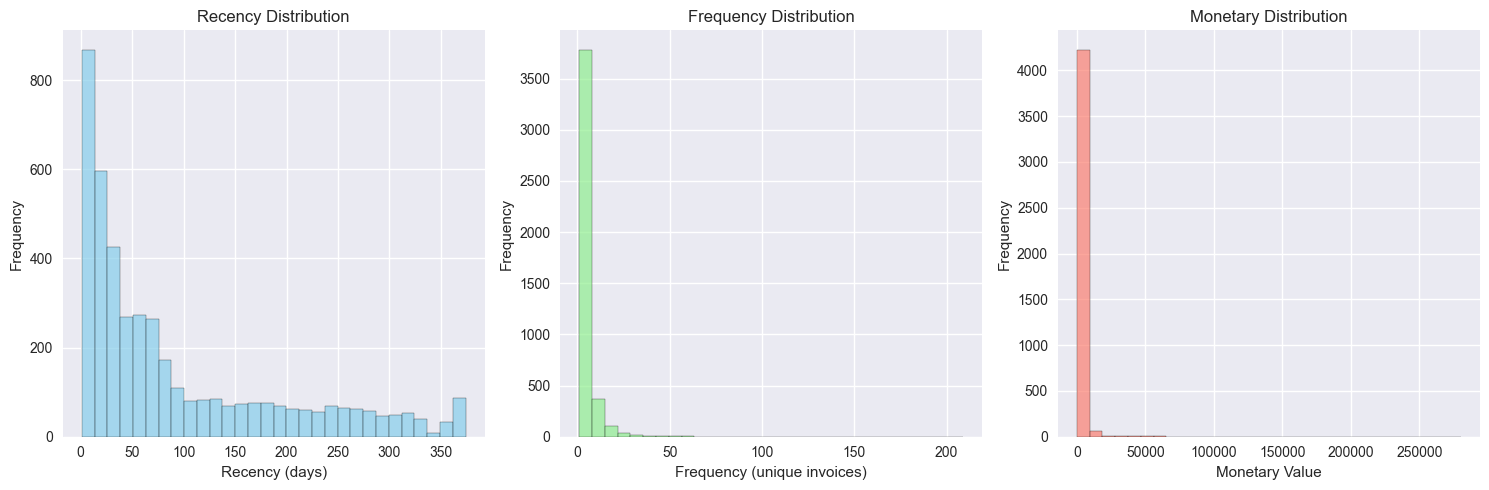

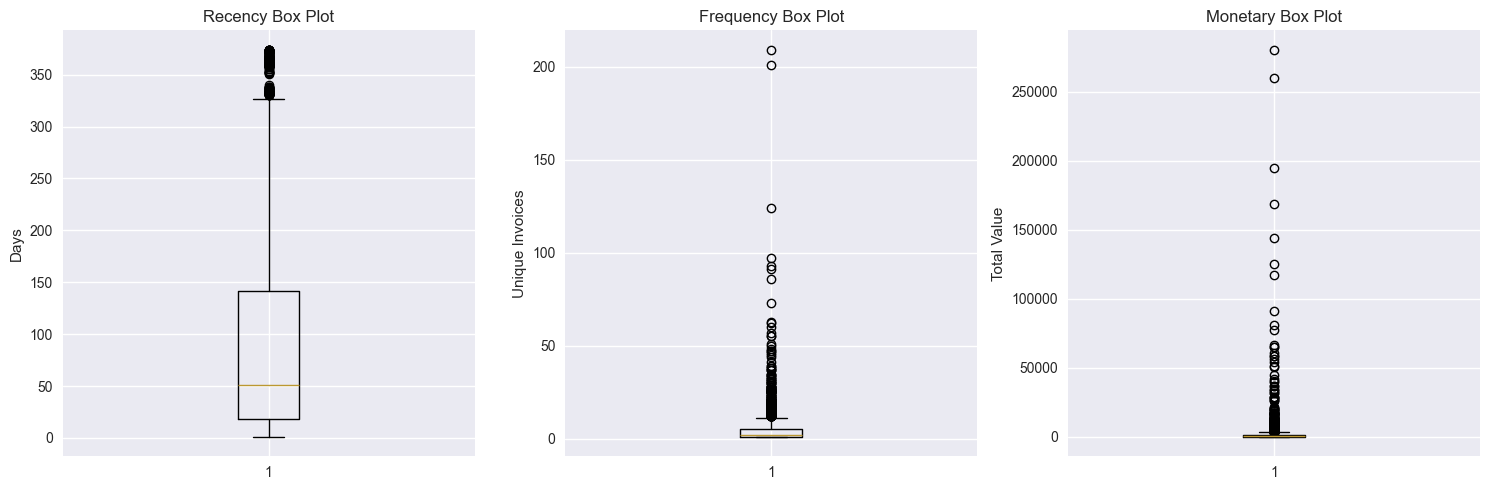


=== RELATIONSHIP ANALYSIS ===


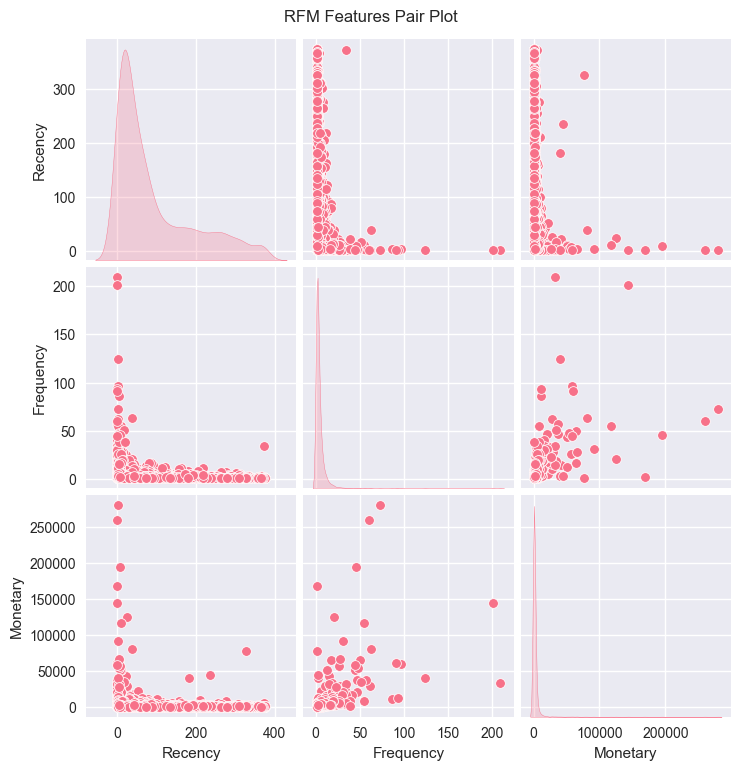

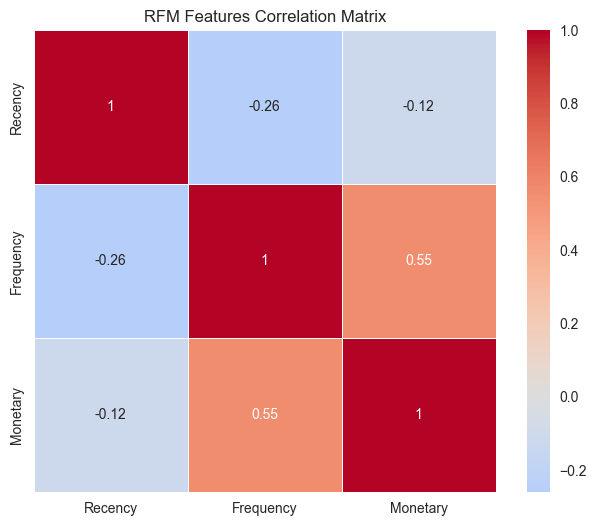

In [48]:
print("RFM FEATURE ENGINEERING")

# Define snapshot date (one day after the last purchase)
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Snapshot date for RFM calculation: {snapshot_date}")

# Calculate RFM metrics
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Quantity': lambda x: (x * df_clean.loc[x.index, 'UnitPrice']).sum()  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print("\nRFM DataFrame shape:", rfm.shape)
print("\nRFM DataFrame head:")
print(rfm.head())

print("=== RFM FEATURES ANALYSIS ===")

# Summary statistics
print("RFM Features Summary Statistics:")
print(rfm.describe())

# Distribution visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograms
axes[0].hist(rfm['Recency'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency (days)')
axes[0].set_ylabel('Frequency')

axes[1].hist(rfm['Frequency'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency (unique invoices)')
axes[1].set_ylabel('Frequency')

axes[2].hist(rfm['Monetary'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Monetary Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Outlier detection with box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(rfm['Recency'])
axes[0].set_title('Recency Box Plot')
axes[0].set_ylabel('Days')

axes[1].boxplot(rfm['Frequency'])
axes[1].set_title('Frequency Box Plot')
axes[1].set_ylabel('Unique Invoices')

axes[2].boxplot(rfm['Monetary'])
axes[2].set_title('Monetary Box Plot')
axes[2].set_ylabel('Total Value')

plt.tight_layout()
plt.show()

# Relationship visualization
print("\n=== RELATIONSHIP ANALYSIS ===")

# Pair plot
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary']], diag_kind='kde')
plt.suptitle('RFM Features Pair Plot', y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('RFM Features Correlation Matrix')
plt.show()


#### Feature Analysis

- All three RFM features show right-skewed distributions
- This skewness indicates that most customers have low values, with few high-value customers
- Log transformation will help normalize these distributions for better clustering
- Frequency and Monetary show positive correlation
- Recency shows negative correlation with Frequency and Monetary
- This suggests that recent customers tend to have higher frequency and monetary values

### 3.5 Handling Outliers and Feature Scaling

As we see some outliers in above analyis, a log transformation for each feature can be done to:
- Address right-skewed distributions
- Reduce the impact of outliers
- Make the data more suitable for distance-based algorithms like K-Means

Feature scaling is the process of transforming your numeric features so they reside on a comparable scale. We will using sklearn `StandardScaler` to scale our RFM features.
- StandardScaler centers the data around mean=0 and std=1
- Essential for K-Means as it's distance-based
- Prevents features with larger scales from dominating the clustering

LOG TRANSFORMATION


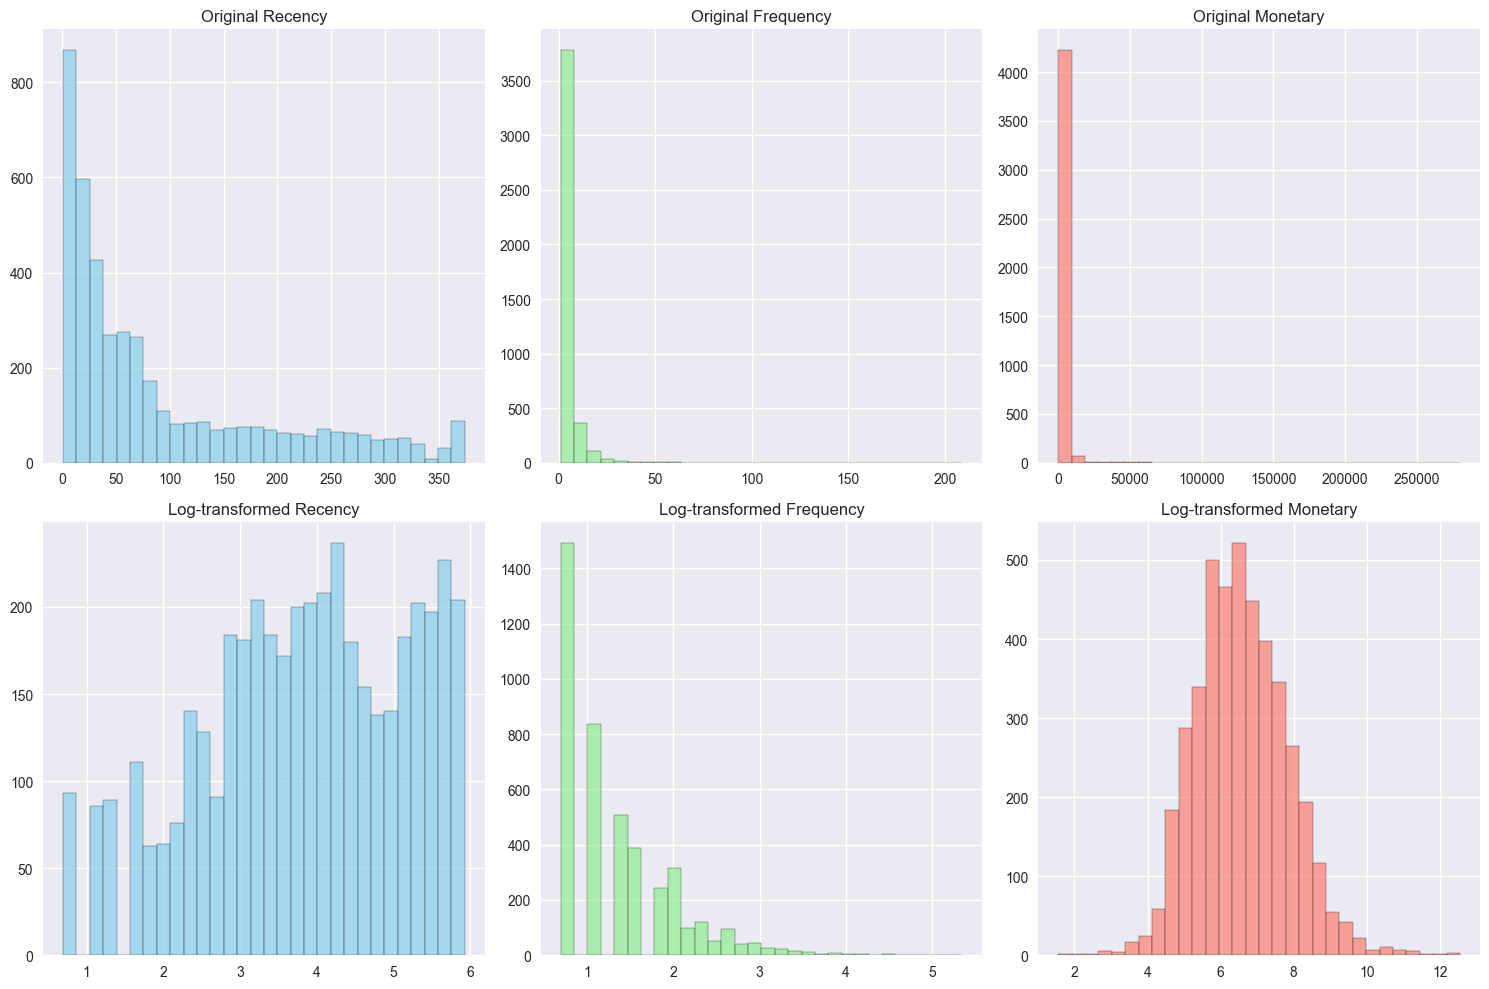


Scaled features shape: (4338, 3)
Scaled features statistics:
Mean: [-8.02595529e-17 -8.18975030e-18 -3.60349013e-16]
Std: [1. 1. 1.]


In [28]:
print("LOG TRANSFORMATION")

# Handle outliers/skewness with log transformation
rfm_log = rfm.copy()
rfm_log['Recency_log'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency_log'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary_log'] = np.log1p(rfm_log['Monetary'])

# Visualize transformed distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original distributions
axes[0, 0].hist(rfm['Recency'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Original Recency')
axes[0, 1].hist(rfm['Frequency'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Original Frequency')
axes[0, 2].hist(rfm['Monetary'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[0, 2].set_title('Original Monetary')

# Log-transformed distributions
axes[1, 0].hist(rfm_log['Recency_log'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Log-transformed Recency')
axes[1, 1].hist(rfm_log['Frequency_log'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Log-transformed Frequency')
axes[1, 2].hist(rfm_log['Monetary_log'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[1, 2].set_title('Log-transformed Monetary')

plt.tight_layout()
plt.show()

# Feature scaling
scaler = StandardScaler()
rfm_features = rfm_log[['Recency_log', 'Frequency_log', 'Monetary_log']]
rfm_scaled = scaler.fit_transform(rfm_features)

print(f"\nScaled features shape: {rfm_scaled.shape}")
print("Scaled features statistics:")
print(f"Mean: {rfm_scaled.mean(axis=0)}")
print(f"Std: {rfm_scaled.std(axis=0)}")

## 4. Unsupervised Model Application (K-Means Clustering)

### 4.1 Model Implementation and Fine-tuning (K-Means Clustering)

To fine-tune our model, we begin by empirically determining the best number of clusters (k) for our K-Means model by looping over k values from 2 to 10, fitting a fresh `KMeans(n_clusters=k, random_state=42, n_init=10)` each time and recording its inertia (the within-cluster sum of squares, or WCSS). These WCSS values are then plotted against k in an Elbow Method chart, allowing us to visually inspect where additional clusters cease to yield significant reductions in WCSS i.e., the “elbow” point. If we look at the chart our elbow point is 3. In my opinion for my application I want decent clusters so that I can see better segmentation.

To complement the elbow analysis, we calculate the average silhouette score for each k in the same range. For each candidate k, we fit KMeans again, generate cluster labels with fit_predict, and compute silhouette_score on the dataset. And we select K that maximizes the silhouette score.

Note: Finding k to maximizing silhouette score approach didn't work for me as it was giving me only 2 clusters which in many real­world RFM settings just splits data into “big spenders” vs. “everyone else.” clusters. Therefore, created minimum threshold to consider those `k` whose silhouette score is within, say, 70% of the max.

=== K-MEANS WITH “LARGER k” SILHOUETTE STRATEGY ===
k=2: Silhouette = 0.433
k=3: Silhouette = 0.337
k=4: Silhouette = 0.338
k=5: Silhouette = 0.316
k=6: Silhouette = 0.312
k=7: Silhouette = 0.309
k=8: Silhouette = 0.303
k=9: Silhouette = 0.281
k=10: Silhouette = 0.277


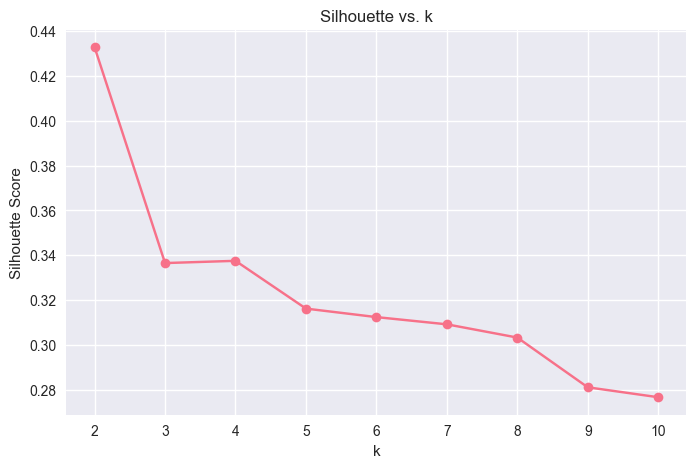


Max silhouette = 0.433, threshold = 0.260
ks within threshold: [(2, np.float64(0.4328265515350663)), (3, np.float64(0.3365174636950013)), (4, np.float64(0.337517049212612)), (5, np.float64(0.3162001336222631)), (6, np.float64(0.3124091056438892)), (7, np.float64(0.30918598433785954)), (8, np.float64(0.30327504528060134)), (9, np.float64(0.281084500299107)), (10, np.float64(0.27665851725435564))]

→ Chosen k = 10 (largest k with silhouette ≥ 90% of max)
Final silhouette (k=10): 0.277
Cluster counts:
 Cluster
7    631
5    619
0    594
2    544
8    455
9    437
1    349
6    302
4    252
3    155
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

print("=== K-MEANS WITH “LARGER k” SILHOUETTE STRATEGY ===")

k_range = range(2, 11)
silhouette_scores = []

# 1) compute silhouette for each k
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette = {score:.3f}")

# 2) plot as usual
plt.figure(figsize=(8,5))
plt.plot(list(k_range), silhouette_scores, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette vs. k')
plt.grid(True)
plt.show()

# 3) pick k within 90% of the max silhouette, then choose the largest k
s_max    = max(silhouette_scores)
threshold = 0.6 * s_max
# build list of (k,score) that pass the threshold
good_ks = [(k, s) for k,s in zip(k_range, silhouette_scores) if s >= threshold]
print(f"\nMax silhouette = {s_max:.3f}, threshold = {threshold:.3f}")
print("ks within threshold:", good_ks)

# select the largest k from that list
optimal_k = max(k for k,_ in good_ks)
print(f"\n→ Chosen k = {optimal_k} (largest k with silhouette ≥ 60% of max)")

# 4) re-fit final model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_log['Cluster'] = kmeans_final.fit_predict(rfm_scaled)

print(f"Final silhouette (k={optimal_k}):",
      f"{silhouette_score(rfm_scaled, rfm_log['Cluster']):.3f}")
print("Cluster counts:\n", rfm_log['Cluster'].value_counts())

### 4.2 Cluster Analysis and Interpretation

Here after our model create 10 clusters and these clusters are label. At this point we can create complex logic to label our clusters but for simplicity I named them by their respective RMF values `R,M,F={value},{value},{value}`.

Plot for customer count by each cluster is shown

=== CLUSTER ANALYSIS AND INTERPRETATION ===
Cluster Characteristics (Original RFM Values):
        Recency        Frequency         Monetary         
           mean median      mean median      mean   median
Cluster                                                   
0        236.05  239.0      1.29    1.0    405.52   349.00
1          5.57    4.0      6.29    6.0   2703.34  1897.57
2         26.28   24.0      3.22    3.0    946.11   841.14
3          4.94    3.0     29.88   22.0  22433.16  9175.04
4          7.68    7.0      1.98    2.0    454.12   388.10
5        124.64  106.0      2.53    2.0    990.33   833.78
6         21.79   17.0     11.23   11.0   4834.73  3981.03
7         46.72   45.0      1.24    1.0    288.19   272.04
8         62.22   52.0      5.44    5.0   2825.57  2100.60
9        230.54  234.0      1.10    1.0    128.19   133.25

=== CUSTOMER SEGMENT PROFILES ===
Overall Average RFM:
Recency        92.536422
Frequency       4.272015
Monetary     2048.688081
dtype: floa

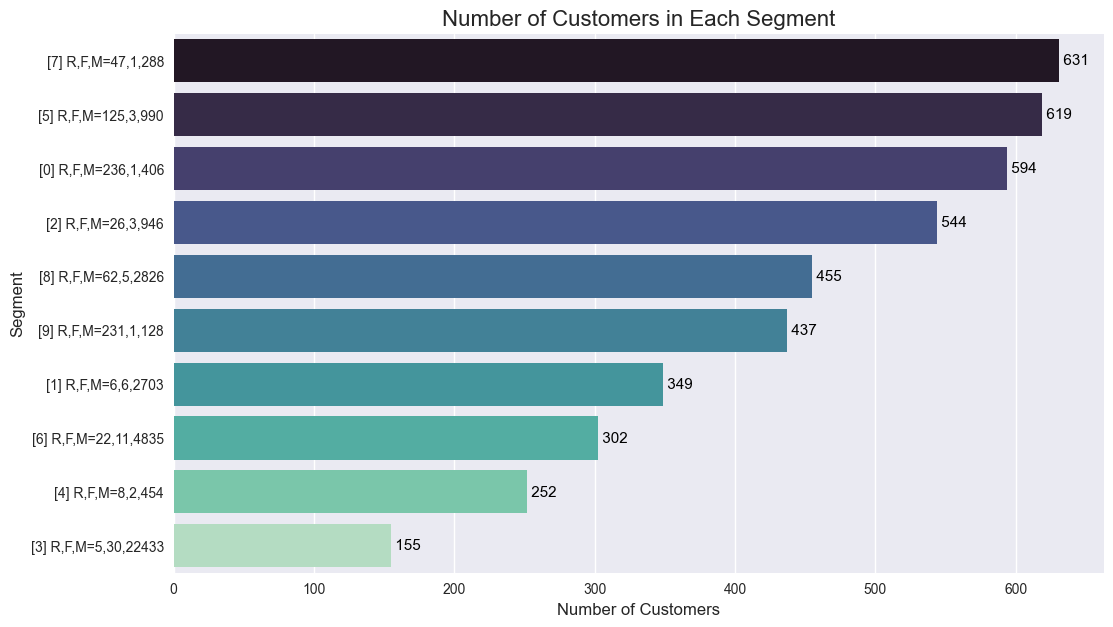


Customer counts per segment:
Segment
[7] R,F,M=47,1,288      631
[5] R,F,M=125,3,990     619
[0] R,F,M=236,1,406     594
[2] R,F,M=26,3,946      544
[8] R,F,M=62,5,2826     455
[9] R,F,M=231,1,128     437
[1] R,F,M=6,6,2703      349
[6] R,F,M=22,11,4835    302
[4] R,F,M=8,2,454       252
[3] R,F,M=5,30,22433    155
Name: count, dtype: int64

=== PCA VISUALIZATION ===


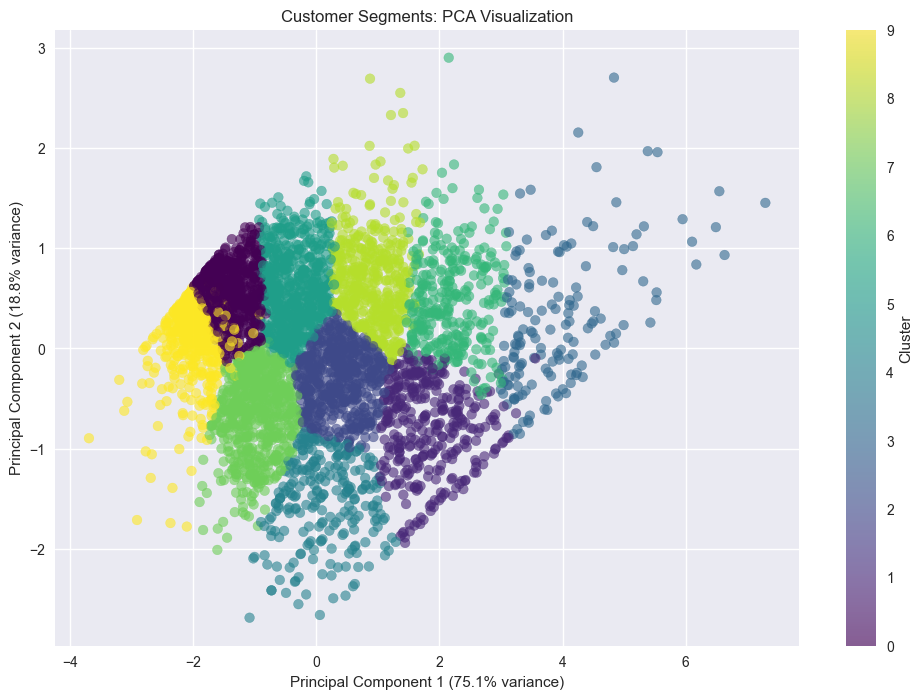

PCA explained variance ratio: [0.75078634 0.18786648]
Total explained variance: 93.9%


In [44]:
print("=== CLUSTER ANALYSIS AND INTERPRETATION ===")

# Characterize clusters using original RFM values
cluster_analysis = rfm.groupby(rfm_log['Cluster']).agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median']
}).round(2)

print("Cluster Characteristics (Original RFM Values):")
print(cluster_analysis)

# Create descriptive profiles
print("\n=== CUSTOMER SEGMENT PROFILES ===")

# Calculate the overall average RFM values
overall_avg = rfm[['Recency', 'Frequency', 'Monetary']].mean()
print("Overall Average RFM:")
print(overall_avg)


# Get the average RFM for each cluster
cluster_avg_rfm = rfm.groupby(rfm_log['Cluster'])[['Recency', 'Frequency', 'Monetary']].mean()

segment_labels = {}
for cluster, row in cluster_avg_rfm.iterrows():
    # Create a descriptive profile based on the scores
    profile = f"[{cluster}] R,F,M={row['Recency']:.0f},{row['Frequency']:.0f},{row['Monetary']:.0f}"
    segment_labels[cluster] = profile
    print(f"\nCluster {cluster}: {profile}")


# Add the new data-driven labels to the DataFrame
rfm_log['Segment'] = rfm_log['Cluster'].map(segment_labels)

# Visualize clusters
print("\n=== CLUSTER VISUALIZATION ===")

segment_counts = rfm_log['Segment'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(y=segment_counts.index, x=segment_counts.values, palette='mako')
plt.title('Number of Customers in Each Segment', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Segment', fontsize=12)

# Add the counts on the bars
for index, value in enumerate(segment_counts):
    plt.text(value, index, f' {value}', va='center', fontsize=11, color='black')

plt.show()

print("\nCustomer counts per segment:")
print(segment_counts)

# PCA for dimensionality reduction and visualization
print("\n=== PCA VISUALIZATION ===")
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], 
                     c=rfm_log['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Customer Segments: PCA Visualization')
plt.colorbar(scatter, label='Cluster')
plt.show()

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.1%}")

## 5. Segment Based Product Recommender System

After creating these clusters we can now make a recommender system to recommend products to each customer segment using cosine similarity matrix. This approach is more scalable that user-based similarity matrix that  would be significantly more compute intensive as its N^2 X M complexity. 

For customer-based = 4000 X 4000 x 4400 = approx 80 billion operations

For segment-based = 10 x 10 x 4400 = 440,000 operations

Code below outputs similarity matrix and top 5 products recommendation for each cluster in above step.


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

print("Building a strategic, segment-based recommender system...")

# Step 1: Create the Segment-Item Interaction Matrix
# We aggregate all purchases within a segment to create a "super-user" profile for it.
print("\nCreating the segment-item interaction matrix...")

df_segmented = pd.merge(df_clean, rfm_log[['CustomerID', 'Segment']], on='CustomerID')

# This matrix will have segments as rows and products as columns.
segment_item_matrix = df_segmented.pivot_table(
    index='Segment', 
    columns='StockCode', 
    values='Quantity', 
    aggfunc='sum', 
    fill_value=0
)

print("Segment-item matrix created successfully.")
print(f"Matrix shape: {segment_item_matrix.shape} (Segments, Products)")

# Step 2: Compute Segment-Segment Similarity
# We'll see which segments have similar purchasing tastes.
print("\nComputing segment-segment similarity matrix...")

segment_similarity = cosine_similarity(segment_item_matrix)
segment_similarity_df = pd.DataFrame(
    segment_similarity,
    index=segment_item_matrix.index,
    columns=segment_item_matrix.index
)

print("Segment-segment similarity matrix:")
print(segment_similarity_df)

# Step 3: Build the Segment-to-Segment Recommender Function
def get_cross_segment_recommendations(target_segment, num_recommendations=5):
    """
    Recommends products to a target segment based on the tastes of similar segments.
    
    Args:
        target_segment (str): The name of the segment to get recommendations for.
        num_recommendations (int): The number of products to recommend.
        
    Returns:
        pandas.DataFrame: A DataFrame with recommended products and their scores.
    """
    # 1. Find segments most similar to the target segment
    similar_segments = segment_similarity_df[target_segment].sort_values(ascending=False).drop(target_segment)
    
    # 2. Identify items that are already popular in the target segment to avoid recommending them.
    target_segment_purchases = segment_item_matrix.loc[target_segment]
    # We define "popular" as the top 100 most purchased items in that segment.
    popular_items_in_target_segment = target_segment_purchases.sort_values(ascending=False).head(100).index
    
    # 3. Calculate recommendation scores
    recommendation_scores = {}
    
    # Loop through similar segments and get their top products
    for segment, similarity_score in similar_segments.items():
        # Get all purchases from the similar segment
        items_in_similar_segment = segment_item_matrix.loc[segment]
        
        # Give more weight to items from more similar segments
        weighted_purchases = items_in_similar_segment * similarity_score
        
        for item, score in weighted_purchases.items():
            # Recommend the item if it's not already popular in the target segment
            if score > 0 and item not in popular_items_in_target_segment:
                recommendation_scores.setdefault(item, 0)
                recommendation_scores[item] += score
    
    # 4. Sort recommendations and return the top N
    sorted_recommendations = sorted(recommendation_scores.items(), key=lambda x: x[1], reverse=True)
    
    top_recommendations = []
    for stock_code, score in sorted_recommendations[:num_recommendations]:
        description = df_clean[df_clean['StockCode'] == stock_code]['Description'].iloc[0]
        top_recommendations.append({'StockCode': stock_code, 'Description': description, 'Recommendation_Score': score})
        
    return pd.DataFrame(top_recommendations)


# Step 4: Generate and Display Cross-Segment Recommendations
print("\n--- Strategic Recommendations to Nurture Customer Segments ---")

unique_segments = rfm_log['Segment'].unique()

for segment in unique_segments:
    print(f"\nRecommendations for nurturing the '{segment}' segment:")
    print("-" * (50 + len(segment)))
    
    recommendations = get_cross_segment_recommendations(segment, num_recommendations=5)
    print(recommendations)

Building a strategic, segment-based recommender system...

Creating the segment-item interaction matrix...
Segment-item matrix created successfully.
Matrix shape: (8, 3665) (Segments, Products)

Computing segment-segment similarity matrix...
Segment-segment similarity matrix:
Segment           R,F,M=143,2,980  R,F,M=244,1,238  R,F,M=31,3,1075  \
Segment                                                               
R,F,M=143,2,980          1.000000         0.644724         0.752597   
R,F,M=244,1,238          0.644724         1.000000         0.669557   
R,F,M=31,3,1075          0.752597         0.669557         1.000000   
R,F,M=49,1,282           0.612031         0.531472         0.803679   
R,F,M=51,7,3640          0.395208         0.358677         0.413783   
R,F,M=6,7,2502           0.726499         0.646317         0.867291   
R,F,M=7,26,19021         0.600127         0.494363         0.609180   
R,F,M=8,2,491            0.536094         0.511537         0.753176   

Segment     

## Final Conclusion 

This project demonstrates that data-driven customer segmentation significantly outperforms traditional threshold-based methods in both accuracy and business value. By combining RFM analysis with machine learning clustering, we created a sophisticated system that:
1. Discovers natural customer segments rather than imposing arbitrary rules.
2. Provides personalized product recommendations based on segment behavior.
3. Scales efficiently to handle growing customer bases.
4. Delivers actionable business insights for marketing and inventory decisions.